reference:


1.   https://pypi.org/project/pandasql/
2.  https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html










In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/capstone project/Project 1/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/capstone project/Project 1/test.csv')

In [4]:
df_train.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [5]:
df_test.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [6]:
df_train.shape,df_test.shape

((27321, 80), (11709, 80))

In [7]:
df_train.describe()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,27321.000000,0.0,27321.0,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,2.732100e+04,...,27115.000000,27115.000000,27115.000000,27115.000000,27115.000000,27053.000000,27130.000000,27130.000000,27130.000000,27130.000000
mean,257331.996303,NaN,140.0,85.646426,28.271806,50081.999524,596.507668,37.508813,-91.288394,1.295106e+08,...,40.319803,40.355099,22.178745,544.238432,2208.761903,0.640434,0.508300,0.047537,0.019089,0.100248
std,21343.859725,NaN,0.0,98.333097,16.392846,29558.115660,232.497482,5.588268,16.343816,1.275531e+09,...,5.886317,8.039585,2.540257,283.546896,1089.316999,0.226640,0.136860,0.037640,0.020796,0.049055
min,220342.000000,NaN,140.0,1.000000,1.000000,602.000000,201.000000,17.929085,-165.453872,4.113400e+04,...,16.008330,13.250000,0.556780,0.664700,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238816.000000,NaN,140.0,29.000000,13.000000,26554.000000,405.000000,33.899064,-97.816067,1.799408e+06,...,36.892050,34.916670,21.312135,355.995825,1471.000000,0.502780,0.425102,0.020810,0.004530,0.065800
50%,257220.000000,NaN,140.0,63.000000,28.000000,47715.000000,614.000000,38.755183,-86.554374,4.866940e+06,...,40.373320,40.583330,22.514410,503.643890,2066.000000,0.690840,0.526665,0.038840,0.013460,0.095205
75%,275818.000000,NaN,140.0,109.000000,42.000000,77093.000000,801.000000,41.380606,-79.782503,3.359820e+07,...,43.567120,45.416670,23.575260,680.275055,2772.000000,0.817460,0.605760,0.065100,0.027488,0.129000
max,294334.000000,NaN,140.0,840.000000,72.000000,99925.000000,989.000000,67.074017,-65.379332,1.039510e+11,...,79.837390,82.250000,30.241270,6197.995200,27250.000000,1.000000,1.000000,0.714290,0.714290,1.000000


In [8]:
df_test.describe()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,11709.000000,0.0,11709.0,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000,1.170900e+04,...,11613.000000,11613.000000,11613.000000,11613.000000,11613.000000,11587.000000,11625.000000,11625.000000,11625.000000,11625.000000
mean,257525.004783,NaN,140.0,85.710650,28.489196,50123.418396,593.598514,37.405491,-91.340229,1.095500e+08,...,40.111999,40.131864,22.148145,550.411243,2233.003186,0.634194,0.505632,0.047960,0.019346,0.099191
std,21466.372658,NaN,0.0,99.304334,16.607262,29775.134038,232.074263,5.625904,16.407818,7.624940e+08,...,5.851192,7.972026,2.554907,280.992521,1072.017063,0.232232,0.139774,0.038693,0.021428,0.048525
min,220336.000000,NaN,140.0,1.000000,1.000000,601.000000,201.000000,17.965835,-166.770979,8.299000e+03,...,15.360240,12.833330,0.737110,0.251910,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238819.000000,NaN,140.0,29.000000,13.000000,25570.000000,404.000000,33.919813,-97.816561,1.718660e+06,...,36.729210,34.750000,21.270920,363.225840,1499.000000,0.492500,0.422020,0.020890,0.004500,0.064590
50%,257651.000000,NaN,140.0,61.000000,28.000000,47362.000000,612.000000,38.618093,-86.643344,4.835000e+06,...,40.196960,40.333330,22.472990,509.103610,2099.000000,0.687640,0.525270,0.038680,0.013870,0.094350
75%,276300.000000,NaN,140.0,109.000000,42.000000,77406.000000,787.000000,41.232973,-79.697311,3.204540e+07,...,43.496490,45.333330,23.549450,685.883910,2800.000000,0.815235,0.605660,0.065340,0.027910,0.128400
max,294333.000000,NaN,140.0,810.000000,72.000000,99929.000000,989.000000,64.804269,-65.695344,5.520166e+10,...,90.107940,90.166670,29.626680,4145.557870,15466.000000,1.000000,1.000000,0.714290,0.714290,0.362750


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

In [11]:
df_train.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

Figure out the primary key and look for the requirement of indexing.

In [12]:
#from the dataset UID(user id ) has a unique value so we cosider it in indexing
df_train.set_index(keys='UID',inplace=True)#set the dataframe with index UID
df_test.set_index(keys='UID',inplace=True)

In [13]:
df_train.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [14]:
df_test.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,tract,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,tract,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,tract,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,tract,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

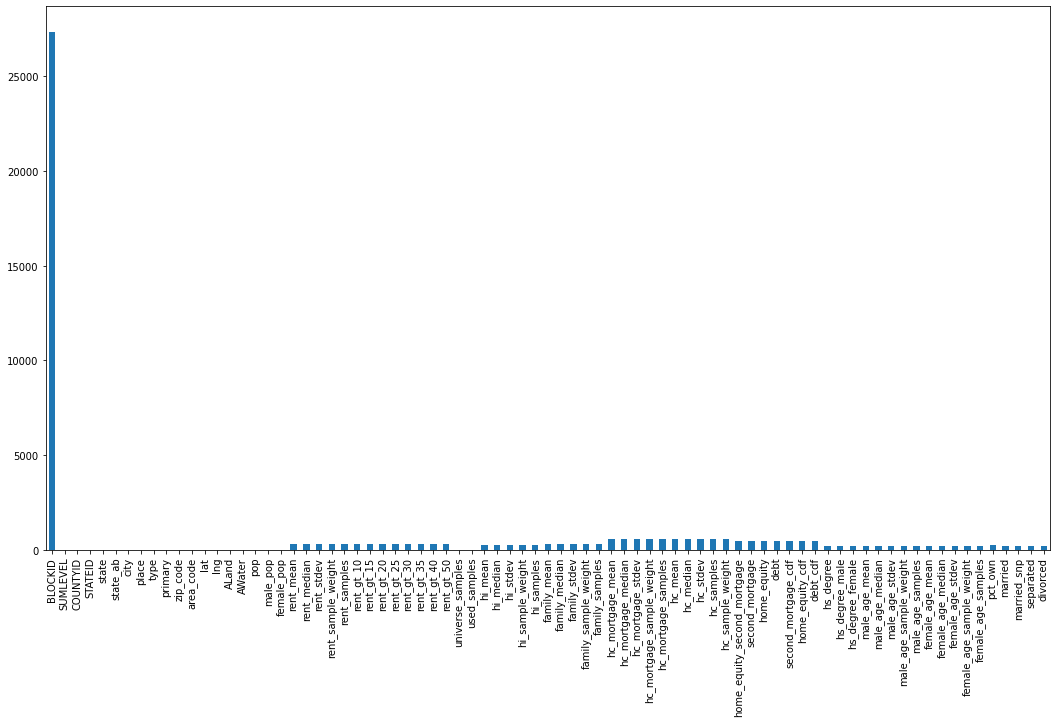

In [15]:
df_train.isnull().sum().plot(kind='bar',figsize=(18,10))

from above we observed that blockid has all null value so we can drop that and sumlevel has no variance in data so it cant contribute much in our analysis so we can drop that also

In [16]:
df_train.drop(columns=['BLOCKID','SUMLEVEL'],inplace=True,axis=1)
df_test.drop(columns=['BLOCKID','SUMLEVEL'],inplace=True,axis=1)

In [17]:
df_train.head(1)

,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.0124,0.0877


In [18]:
df_test.head(1)

,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
255504,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,48239,313,...,34.78682,33.75,21.58531,416.48097,1938.0,0.70252,0.28217,0.0591,0.03813,0.14299


In [19]:
#Imputing numerical columns for training dataset
missing_train_val = []
for col in df_train.columns:
  if df_train[col].isna().sum() != 0:
    missing_train_val.append(col)

print(missing_train_val)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [20]:
missing_test_val = []
for col in df_test.columns:
  if df_test[col].isna().sum() != 0:
    missing_test_val.append(col)

print(missing_test_val)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. However, this comes at the price of losing data which may be valuable (even though incomplete) so we convert nan value with  mean(continuous value in numerical col)

In [21]:
#Replacing nan values with mean in training dataset
for col in df_train.columns:
  if col in missing_train_val:
    df_train[col].replace(np.nan,df_train[col].mean(),inplace=True)

In [22]:
df_train.isna().sum().sum()

0

In [23]:
#Replacing nan values with mean in test dataset
for col in df_test.columns:
  if col in missing_test_val:
    df_test[col].replace(np.nan,df_test[col].mean(),inplace=True)

In [24]:
df_test.isna().sum().sum()

0

Exploratory Data Analysis (EDA):

    4.Perform debt analysis. You may take the following steps:

 a) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

In [25]:
df_train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [26]:
df_train.second_mortgage ##percentage of households with a second mortgage

UID
267822    0.02077
246444    0.02222
245683    0.00000
279653    0.01086
247218    0.05426
           ...   
279212    0.00000
277856    0.02112
233000    0.02024
287425    0.07550
265371    0.01412
Name: second_mortgage, Length: 27321, dtype: float64

In [27]:
df_train.pct_own ##percent ownership

UID
267822    0.79046
246444    0.52483
245683    0.85331
279653    0.65037
247218    0.13046
           ...   
279212    0.60422
277856    0.68072
233000    0.78508
287425    0.93970
265371    0.27912
Name: pct_own, Length: 27321, dtype: float64

In [28]:
pip install -U pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=5e5d02607b5cac8d9225effe28226aee6913884089713a81957e126caff400e1
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [29]:
from pandasql import sqldf
query ="select place,second_mortgage,pct_own,lat,lng from df_train where pct_own>0.1 and second_mortgage<0.5 order by second_mortgage DESC LIMIT 2500;"
pysqldf = lambda q: sqldf(q, globals())
df_train_loc = pysqldf(query)

In [30]:
df_train_loc.head()

,place,second_mortgage,pct_own,lat,lng
0,Worcester City,0.43363,0.20247,42.254262,-71.800347
1,Harbor Hills,0.31818,0.15618,40.751809,-73.853582
2,Glen Burnie,0.30212,0.22380,39.127273,-76.635265
3,Egypt Lake-leto,0.28972,0.11618,28.029063,-82.495395
4,Lincolnwood,0.28899,0.14228,41.967289,-87.652434


In [31]:
df_train_loc.to_csv("/content/drive/MyDrive/capstone project/Project 1/file/df_train_loc.csv")

b) Use the following bad debt equation: Bad Debt = P (Second Mortgage ∩ Home Equity Loan) Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage

In [32]:
df_train['Bad_Debt'] = df_train['second_mortgage']+df_train['home_equity']-df_train['home_equity_second_mortgage']

c) Create pie charts to show overall debt and bad debt

In [33]:
df_train.Bad_Debt.head()

UID
267822    0.09408
246444    0.04274
245683    0.09512
279653    0.01086
247218    0.05426
Name: Bad_Debt, dtype: float64

In [34]:
df_train.debt.head()

UID
267822    0.52963
246444    0.60855
245683    0.73484
279653    0.52714
247218    0.51938
Name: debt, dtype: float64

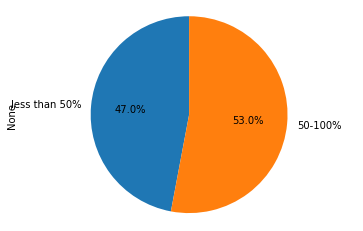

In [35]:
df_train['bins'] = pd.cut(df_train['Bad_Debt'],bins=[0,0.10,1], labels=["less than 50%","50-100%"])
df_train.groupby(['bins']).size().plot(kind='pie',subplots=True,startangle=90, autopct='%1.1f%%')
plt.axis('equal')

plt.show()

Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

In [36]:
#plt.figure(figsize=(10,500))
#sns.boxplot(data=df_train,x='second_mortgage',y='city') ##reading a plot is difficult in considering all data simultaneously so observing 5 cities data in above feilds

In [37]:
df_train.city.head(10)

UID
267822               Hamilton
246444             South Bend
245683               Danville
279653               San Juan
247218              Manhattan
221087                Trinity
286689                 Nocona
280558                Taylors
269138    South Richmond Hill
227164    Rancho Palos Verdes
Name: city, dtype: object

In [38]:
df_box_Hamilton=df_train.loc[df_train['city']=='Hamilton']
df_box_Hamilton.head()

,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,Bad_Debt,bins
UID,,,,,,,,,,,,,,,,,,,,,
267822,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,...,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,0.09408,less than 50%
263797,21,34,New Jersey,NJ,Hamilton,Yardville,City,tract,8610,609,...,24.05831,732.58443,3124.0,0.64400,0.56377,0.01980,0.00990,0.04892,0.18071,50-100%
270979,17,39,Ohio,OH,Hamilton,Hamilton City,Village,tract,45015,513,...,22.66500,565.32725,2528.0,0.61278,0.47397,0.04419,0.02663,0.13741,0.15005,50-100%
259028,95,28,Mississippi,MS,Hamilton,Hamilton,CDP,tract,39746,662,...,22.79602,483.01311,1954.0,0.83241,0.58678,0.01052,0.00000,0.11721,0.02130,less than 50%
270984,17,39,Ohio,OH,Hamilton,New Miami,Village,tract,45013,513,...,24.55724,682.81171,2912.0,0.63194,0.55697,0.01322,0.00000,0.15209,0.15651,50-100%


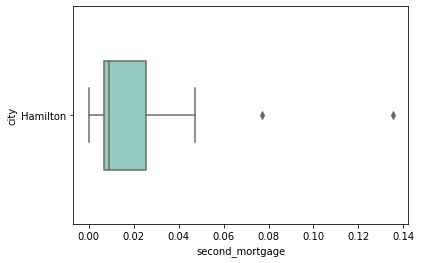

In [39]:

sns.boxplot(data=df_box_Hamilton,x='second_mortgage',y='city',width=0.5,palette="Set3")

In [40]:
df_box_SouthBend =df_train.loc[df_train['city']=='South Bend']
df_box_Danville =df_train.loc[df_train['city']=='Danville']
df_box_SanJuan =df_train.loc[df_train['city']=='San Juan']
df_box_Manhattan =df_train.loc[df_train['city']=='Manhattan']
df_box_Nocona =df_train.loc[df_train['city']=='Nocona']
df_box_cities = pd.concat([df_box_SouthBend,df_box_Danville,df_box_SanJuan,df_box_Manhattan,df_box_Nocona])

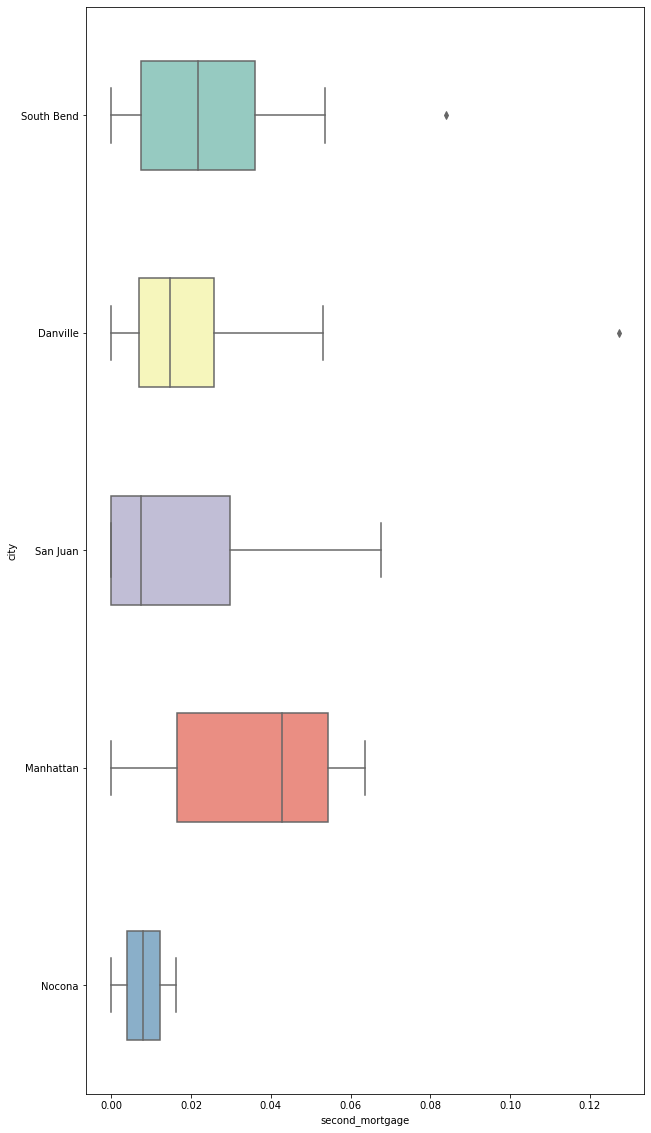

In [41]:
plt.figure(figsize=(10,20))
sns.boxplot(data=df_box_cities,x='second_mortgage',y='city',width=0.5,palette="Set3")
plt.show()

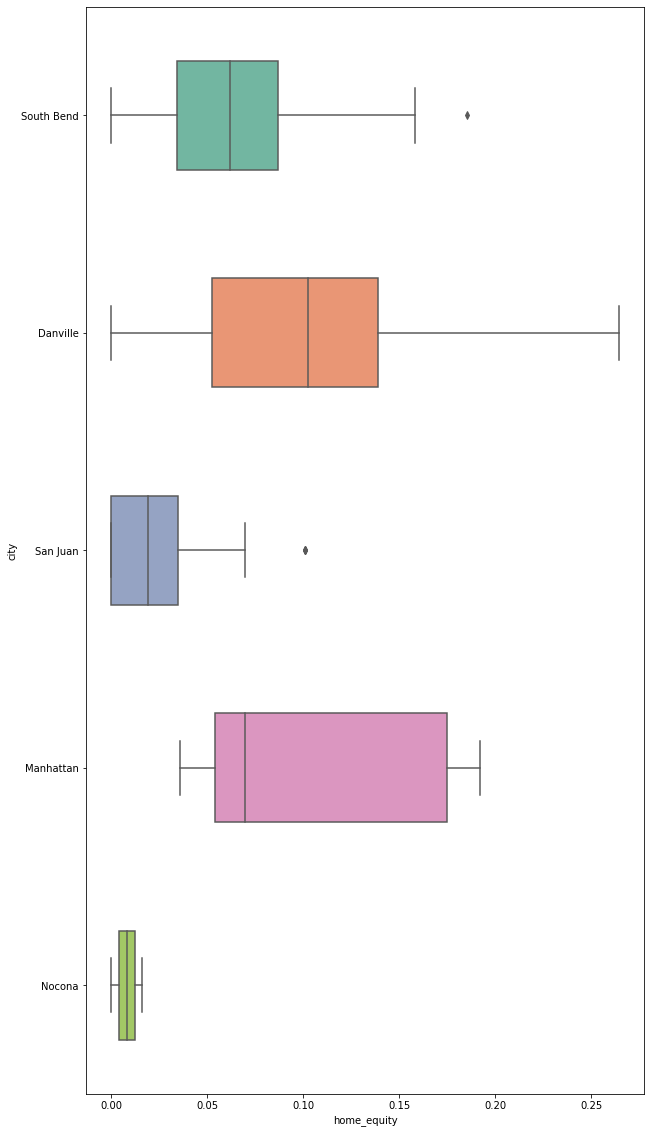

In [42]:
plt.figure(figsize=(10,20))
sns.boxplot(data=df_box_cities,x='home_equity',y='city',width=0.5,palette="Set2")
plt.show()

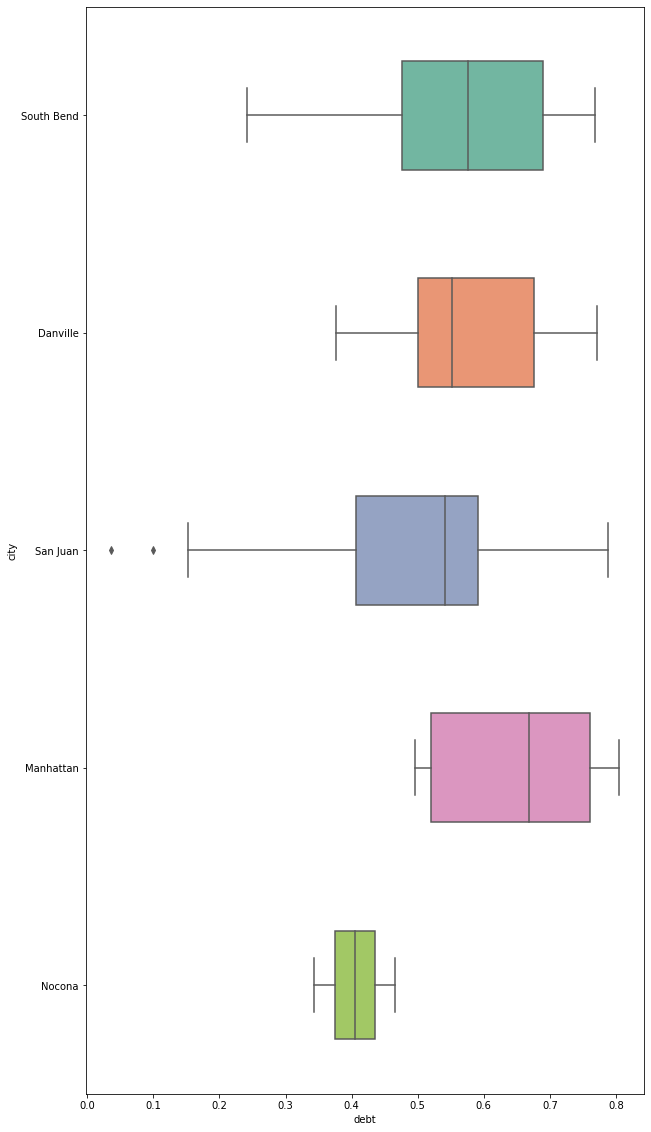

In [43]:
plt.figure(figsize=(10,20))
sns.boxplot(data=df_box_cities,x='debt',y='city',width=0.5,palette="Set2")
plt.show()

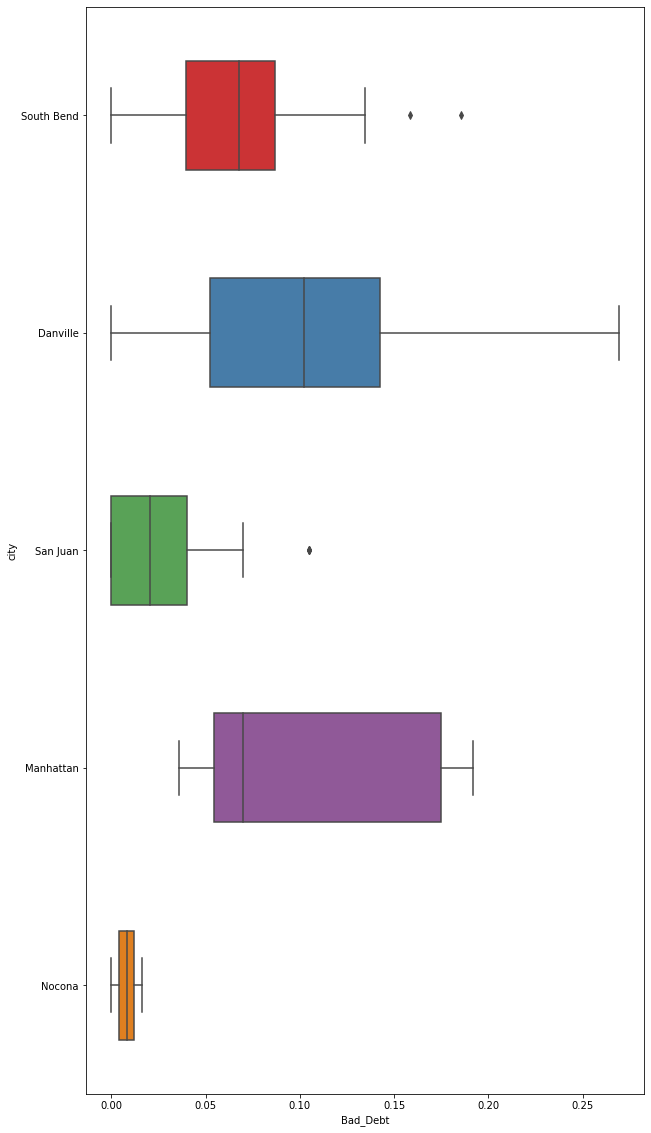

In [44]:
plt.figure(figsize=(10,20))
sns.boxplot(data=df_box_cities,x='Bad_Debt',y='city',width=0.5,palette="Set1")
plt.show()

e) Create a collated income distribution chart for family income, house hold income, and remaining income

In [45]:
df_train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [46]:
df_train.hi_mean.head()#The mean household income of the specified geographic location.

UID
267822    63125.28406
246444    41931.92593
245683    84942.68317
279653    48733.67116
247218    31834.15466
Name: hi_mean, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


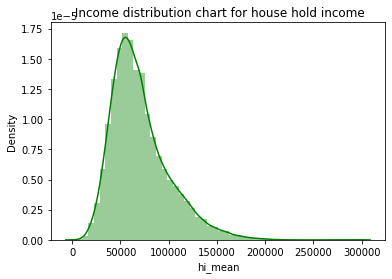

In [47]:
sns.distplot(df_train.hi_mean,color='green')
plt.title(' Income distribution chart for house hold income')
plt.show()

In [48]:
df_train.family_mean.head()#The mean family income of the specified geographic location.

UID
267822    67994.14790
246444    50670.10337
245683    95262.51431
279653    56401.68133
247218    54053.42396
Name: family_mean, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


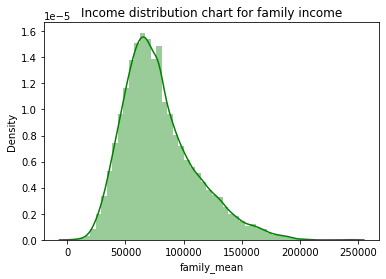

In [49]:
sns.distplot(df_train.family_mean,color='green')
plt.title('Income distribution chart for family income')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


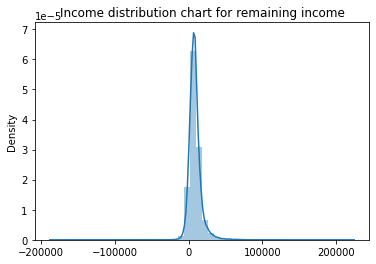

In [50]:
sns.distplot(df_train['family_mean']-df_train['hi_mean'])
plt.title('Income distribution chart for remaining income')
plt.show()

1. Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements):



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

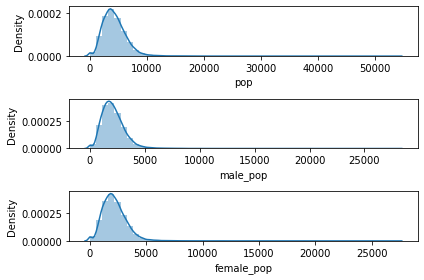

In [51]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1)
sns.distplot(df_train['pop'],ax=ax1)
sns.distplot(df_train['male_pop'],ax=ax2)
sns.distplot(df_train['female_pop'],ax=ax3)
plt.subplots_adjust(wspace=0.9,hspace=0.9)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


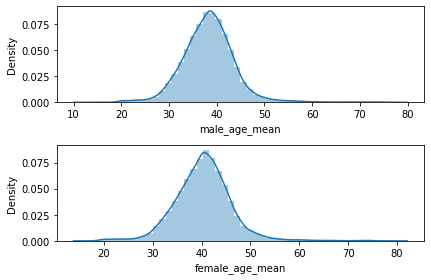

In [52]:
fig,(ax1,ax2)=plt.subplots(2,1)
sns.distplot(df_train['male_age_mean'],ax=ax1)
sns.distplot(df_train['female_age_mean'],ax=ax2)
plt.subplots_adjust(wspace = 0.8,hspace = 0.8)
plt.tight_layout()
plt.show()

____________________seems like a normally distributed data_________________

a) Use pop and ALand variables to create a new field called population density

In [53]:
df_train['pop_density'] = df_train['pop']/df_train['ALand']

In [54]:
df_train['pop_density'].head()

UID
267822    0.000026
246444    0.001687
245683    0.000099
279653    0.002442
247218    0.002207
Name: pop_density, dtype: float64

In [55]:
df_test['pop_density']=df_test['pop']/df_test['ALand']


In [56]:
df_test['pop_density'].head()

UID
255504    0.001260
252676    0.000257
276314    0.000015
248614    0.000005
286865    0.000452
Name: pop_density, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


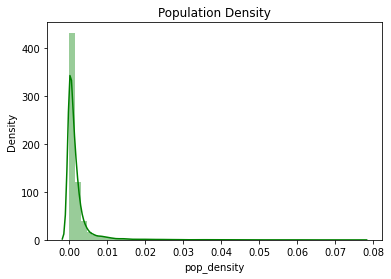

In [57]:
sns.distplot(df_train['pop_density'],color='green')
plt.title('Population Density')
plt.show()

b) Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age 

In [58]:
df_train['total_male_median_age']=df_train['male_age_median']*df_train['male_pop']

In [59]:
df_train['total_female_median_age']=df_train['female_age_median']*df_train['female_pop']

In [60]:
df_test['total_male_median_age']=df_test['male_age_median']*df_test['male_pop']

In [61]:
df_test['total_female_median_age']=df_test['female_age_median']*df_test['female_pop']

In [62]:
df_train['median_age']=(df_train['total_male_median_age']+df_train['total_female_median_age'])/2
df_test['median_age']=(df_test['total_male_median_age']+df_test['total_female_median_age'])/2

In [63]:
df_train[['total_male_median_age','total_female_median_age','male_age_median','female_age_median','male_pop','female_pop','median_age']].head()

,total_male_median_age,total_female_median_age,male_age_median,female_age_median,male_pop,female_pop,median_age
UID,,,,,,,
267822,114928.00000,118682.65794,44.00000,45.33333,2612,2618,116805.328970
246444,43168.00000,48256.99572,32.00000,37.58333,1349,1284,45712.497860
245683,148755.82119,138694.32254,40.83333,42.83333,3643,3238,143725.071865
279653,55813.92047,78859.41147,48.91667,50.58333,1141,1559,67336.665970
247218,57969.50862,65850.73983,22.41667,21.58333,2586,3051,61910.124225


c) Visualize the findings using appropriate chart type

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


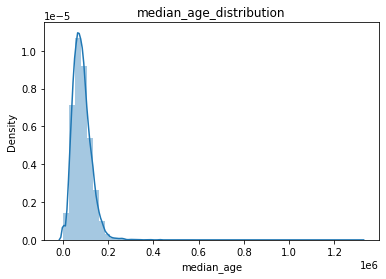

In [64]:
sns.distplot(df_train['median_age'])
plt.title('median_age_distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


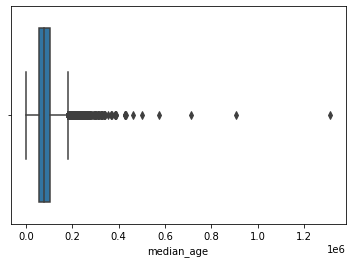

In [65]:
#outliers in median age distribution
sns.boxplot(df_train['median_age'])
plt.show()

2. Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.



In [66]:
df_train['pop'].describe()

count    27321.000000
mean      4316.032685
std       2169.226173
min          0.000000
25%       2885.000000
50%       4042.000000
75%       5430.000000
max      53812.000000
Name: pop, dtype: float64

In [67]:
df_train['pop_bin']=pd.cut(df_train['pop'],bins=5,labels=['very_low','low','medium','high','very_high'])

In [68]:
df_train[['pop','pop_bin']].head()

,pop,pop_bin
UID,,
267822,5230,very_low
246444,2633,very_low
245683,6881,very_low
279653,2700,very_low
247218,5637,very_low


In [69]:
df_train['pop_bin'].value_counts()

very_low     27058
low            246
medium           9
high             7
very_high        1
Name: pop_bin, dtype: int64

a) Analyze the married, separated, and divorced population for these population brackets

In [70]:
df_train[['married','separated','divorced']].head()

,married,separated,divorced
UID,,,
267822,0.57851,0.01240,0.08770
246444,0.34886,0.01426,0.09030
245683,0.64745,0.01607,0.10657
279653,0.47257,0.02021,0.10106
247218,0.12356,0.00000,0.03109


In [71]:
df_train.groupby('pop_bin')[['married','separated','divorced']].count()

,married,separated,divorced
pop_bin,,,
very_low,27058,27058,27058
low,246,246,246
medium,9,9,9
high,7,7,7
very_high,1,1,1


b) Visualize using appropriate chart type

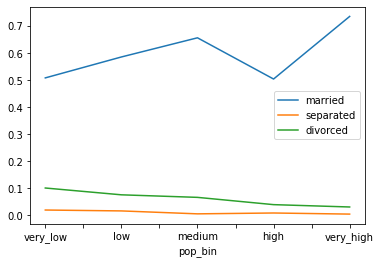

In [72]:
pop_bin_mar_unmar_sep =df_train.groupby('pop_bin')[['married','separated','divorced']].mean()
pop_bin_mar_unmar_sep.plot()
plt.show()

___________very High group has highest no of married population and lowest no of separated and divorce___________
__________very low group has highest no  of married population and lowest no of separated and divorced population__________

3. Please detail your observations for rent as a percentage of income at an overall level, and for different states.

In [73]:
rent_state_mean = df_train.groupby('state')['rent_mean'].mean()

In [74]:
rent_state_mean.head()

state
Alabama        774.004927
Alaska        1185.763570
Arizona       1097.753511
Arkansas       720.918575
California    1471.133857
Name: rent_mean, dtype: float64

In [75]:
income_state_mean = df_train.groupby('state')['family_mean'].mean()
income_state_mean.head()

state
Alabama       67030.064213
Alaska        92136.545109
Arizona       73328.238798
Arkansas      64765.377850
California    87655.470820
Name: family_mean, dtype: float64

In [76]:
rent_per_income = rent_state_mean/income_state_mean

In [77]:
rent_per_income.head()

state
Alabama       0.011547
Alaska        0.012870
Arizona       0.014970
Arkansas      0.011131
California    0.016783
dtype: float64

In [78]:
#overall percnentage of  rent as a percentage of income
sum(df_train['rent_mean'])/sum(df_train['family_mean'])

0.013358170721473864

4. Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

 

In [79]:
df_train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [80]:
corr = df_train[['COUNTYID', 'STATEID','type','zip_code','pop','rent_mean',
                 'hi_mean','family_mean','hc_mortgage_mean','second_mortgage','home_equity','hs_degree','debt',
                 'male_age_mean','female_age_mean','married','separated','divorced','pop_density','median_age']].corr(method='pearson')

In [81]:
corr.head()

,COUNTYID,STATEID,zip_code,pop,rent_mean,hi_mean,family_mean,hc_mortgage_mean,second_mortgage,home_equity,hs_degree,debt,male_age_mean,female_age_mean,married,separated,divorced,pop_density,median_age
COUNTYID,1.000000,0.224549,0.036527,-0.002662,-0.099668,-0.078694,-0.075688,-0.139581,-0.039283,-0.123939,-0.062703,-0.086231,-0.063620,-0.056527,-0.021428,0.069059,0.048850,-0.080509,-0.028067
STATEID,0.224549,1.000000,-0.261465,-0.036599,-0.215943,-0.085679,-0.071612,-0.167274,-0.112512,-0.145301,0.014132,-0.160532,-0.024616,-0.017443,0.025763,0.030409,0.018748,-0.013671,-0.038674
zip_code,0.036527,-0.261465,1.000000,0.083058,0.073246,0.001909,-0.024658,-0.016521,0.067693,-0.073191,-0.077672,0.057775,-0.103520,-0.138374,0.030217,-0.048023,0.043310,-0.119014,0.018460
pop,-0.002662,-0.036599,0.083058,1.000000,0.160590,0.166913,0.128173,0.110659,0.079675,0.099352,0.049238,0.231013,-0.187902,-0.192013,0.167656,-0.083182,-0.160931,0.033740,0.912718
rent_mean,-0.099668,-0.215943,0.073246,0.160590,1.000000,0.753920,0.701019,0.750081,0.150331,0.408837,0.362944,0.432481,0.043144,0.003107,0.255671,-0.188108,-0.374508,0.156928,0.185565


In [82]:
df_train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

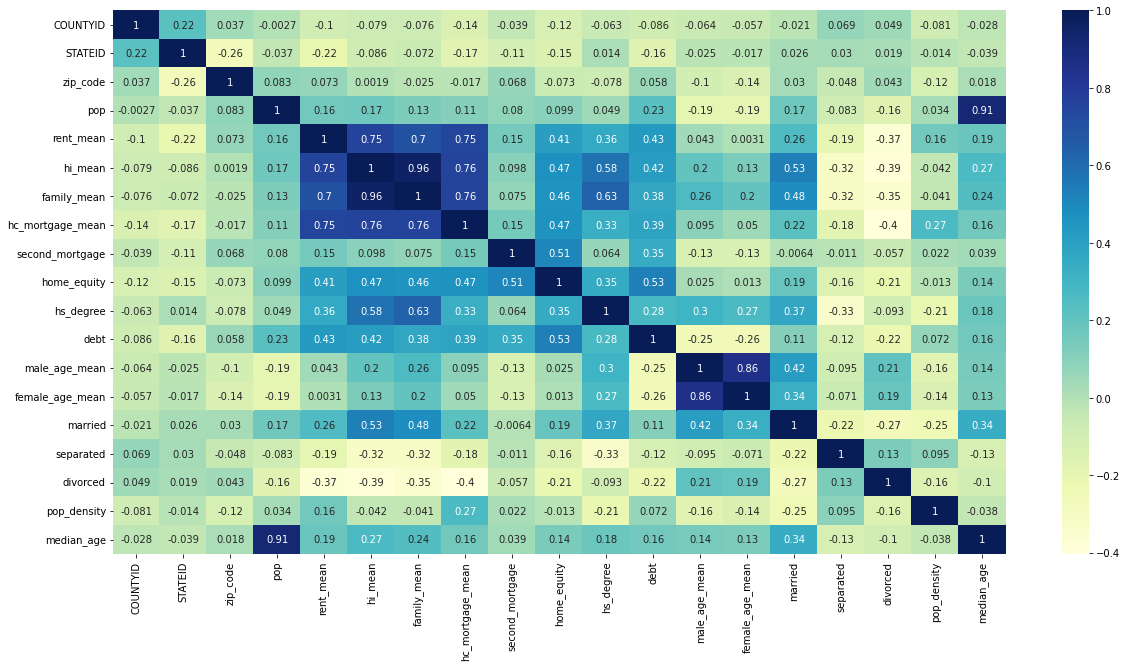

In [83]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap="YlGnBu")

In [84]:
df_train.to_csv("/content/drive/MyDrive/capstone project/Project 1/file/df_train1.csv")

____________married and hi_mean are positively correlated
___________-hi_mean and rent mean also positively correlated
___________second_mortgage and home_equity are positively correlated


1. The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 2. Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent      random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain          insight into the linear relationships in the data. Following are the list of latent variables:


• Highschool graduation rates

• Median population age

• Second mortgage statistics

• Percent own

• Bad debt expense

In [85]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 276 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 199 kB 13.3 MB/s 
     |████████████████████████████████| 98 kB 8.3 MB/s 
     |████████████████████████████████| 8.8 MB 54.7 MB/s 
     |████████████████████████████████| 468 kB 49.4 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=c2ae73fb90393feecfd1512b7ee5c86c8cc1a1016df76aa6e7735d7458ad87b2
  Stored in directory: /root/.cache/pip/wheels/ed/90/48/766e09628cc5bbcf57c2eb063972c1e956a03422dd6d84fde2
Successfully built factor-analyzer


In [86]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [87]:
fa = FactorAnalyzer(n_factors=5,)
fa.fit_transform(df_train.select_dtypes(exclude=('object','category')))
fa.loadings_

array([[ 1.64084330e-02, -1.09968768e-01, -1.80695721e-02,
        -5.67248029e-02,  4.63821526e-02],
       [ 9.40062237e-03, -1.06967671e-01,  2.95448664e-02,
        -1.41282765e-01,  1.17121839e-01],
       [ 4.87285163e-02, -8.44716430e-02, -1.18211232e-01,
        -4.89697564e-02, -1.09236522e-01],
       [ 1.96079042e-02,  2.10752396e-02,  7.87516102e-03,
         3.00705896e-02, -5.21961997e-05],
       [-1.00212603e-01,  8.53287878e-02, -3.82513619e-02,
        -1.37449096e-01, -1.59541077e-01],
       [-3.97026015e-02, -8.69745561e-03,  1.34528600e-01,
         1.04364388e-02,  1.16187417e-01],
       [-1.91490193e-02, -4.03138552e-02,  3.80746796e-02,
        -8.98665507e-02,  6.38694436e-02],
       [-1.49333592e-02, -9.68844717e-04, -1.22290165e-03,
        -4.28389964e-02,  2.50865767e-02],
       [ 9.58317907e-01,  5.87799231e-02, -1.58279024e-01,
        -9.86280418e-03, -5.24509909e-02],
       [ 9.21271727e-01,  5.50361387e-02, -1.75370526e-01,
        -3.01801578e-02

In [88]:
fa.get_eigenvalues()

(array([ 1.63205739e+01,  1.35290814e+01,  8.49540096e+00,  4.69104505e+00,
         4.06252046e+00,  3.12037459e+00,  2.37798361e+00,  2.14583445e+00,
         1.52501622e+00,  1.45624160e+00,  1.33459634e+00,  1.25305131e+00,
         1.15842482e+00,  9.94088902e-01,  9.20444401e-01,  8.90392527e-01,
         8.84764734e-01,  8.27678028e-01,  7.25753148e-01,  6.17753538e-01,
         6.13439432e-01,  5.92983208e-01,  5.66557397e-01,  5.60575952e-01,
         5.15532394e-01,  4.94697739e-01,  4.11058305e-01,  3.76292009e-01,
         3.65848625e-01,  3.33012015e-01,  3.15898961e-01,  3.04764671e-01,
         2.78101223e-01,  2.59012143e-01,  2.53721664e-01,  2.16816276e-01,
         2.03817751e-01,  1.98172283e-01,  1.81155632e-01,  1.77827413e-01,
         1.42853809e-01,  1.32214618e-01,  1.31167507e-01,  1.25588024e-01,
         1.04970424e-01,  9.15178753e-02,  9.05947401e-02,  8.91450171e-02,
         5.86832300e-02,  5.73304574e-02,  5.49191872e-02,  5.03949974e-02,
         4.6

In [89]:
fa.get_factor_variance()

(array([14.2330395 , 12.45682255,  7.94100883,  5.83972108,  5.35480601]),
 array([0.18727684, 0.16390556, 0.10448696, 0.07683844, 0.07045797]),
 array([0.18727684, 0.3511824 , 0.45566935, 0.53250779, 0.60296576]))

In [90]:
fa.n_factors

5

Data Modeling :

1. Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. Please refer ‘deplotment_RE.xlsx’. Column hc_mortgage_mean is predicted variable. This is the mean monthly     mortgage and owner costs of specified geographical location. Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean.
a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

b) Run another model at State level. There are 52 states in USA.

c) Keep below considerations while building a linear regression model. Data Modeling :

• Variables should have significant impact on predicting Monthly mortgage and owner costs

• Utilize all predictor variable to start with initial hypothesis

• R square of 60 percent and above should be achieved

• Ensure Multi-collinearity does not exist in dependent variables

• Test if predicted variable is normally distributed



In [91]:
df_train[['COUNTYID', 'STATEID','type','zip_code','pop','rent_mean',
                 'hi_mean','family_mean','second_mortgage','home_equity','hs_degree','debt',
                 'male_age_mean','female_age_mean','married','separated','divorced','pop_density','median_age']].head()

,COUNTYID,STATEID,type,zip_code,pop,rent_mean,hi_mean,family_mean,second_mortgage,home_equity,hs_degree,debt,male_age_mean,female_age_mean,married,separated,divorced,pop_density,median_age
UID,,,,,,,,,,,,,,,,,,,
267822,53,36,City,13346,5230,769.38638,63125.28406,67994.14790,0.02077,0.08919,0.89288,0.52963,42.48574,44.48629,0.57851,0.01240,0.08770,0.000026,116805.328970
246444,141,18,City,46616,2633,804.87924,41931.92593,50670.10337,0.02222,0.04274,0.90487,0.60855,34.84728,36.48391,0.34886,0.01426,0.09030,0.001687,45712.497860
245683,63,18,City,46122,6881,742.77365,84942.68317,95262.51431,0.00000,0.09512,0.94288,0.73484,39.38154,42.15810,0.64745,0.01607,0.10657,0.000099,143725.071865
279653,127,72,Urban,927,2700,803.42018,48733.67116,56401.68133,0.01086,0.01086,0.91500,0.52714,48.64749,47.77526,0.47257,0.02021,0.10106,0.002442,67336.665970
247218,161,20,City,66502,5637,938.56493,31834.15466,54053.42396,0.05426,0.05426,1.00000,0.51938,26.07533,24.17693,0.12356,0.00000,0.03109,0.002207,61910.124225


In [92]:
df_train['type'].unique()

array(['City', 'Urban', 'Town', 'CDP', 'Village', 'Borough'], dtype=object)

In [93]:
type_dic = {'type':{'City':1,
                    'Urban':2,
                    'Town':3,
                    'CDP':4,
                    'Village':5,
                    'Borough':6}}
df_train.replace(type_dic,inplace=True)                    


In [94]:
df_train['type'].unique()

array([1, 2, 3, 4, 5, 6])

In [95]:
df_test.replace(type_dic,inplace=True)

In [96]:
df_test['type'].unique()

array([4, 1, 6, 3, 5, 2])

In [97]:
features=['COUNTYID', 'STATEID','type','zip_code','pop','rent_mean',
                 'hi_mean','family_mean','second_mortgage','home_equity','hs_degree','debt',
                 'male_age_mean','female_age_mean','married','separated','divorced','pop_density','median_age']

In [98]:
x_train=df_train[features]
y_train=df_train['hc_mortgage_mean']

In [99]:
x_test=df_test[features]
y_test=df_test['hc_mortgage_mean']

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score

To avoid data leakage, the standardization of numerical features should always be performed after data splitting and only from training data. Furthermore, we obtain all necessary statistics for our features (mean and standard deviation) from training data and also use them on test data. Note that we don’t standardize our dummy variables (which only have values of 0 or 1).



In [101]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((27321, 19), (27321,), (11709, 19), (11709,))

In [102]:
sc=StandardScaler()
x_train_scale = sc.fit_transform(x_train)
x_test_scale = sc.fit_transform(x_test)

a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.


**Linear Regression**

In [103]:

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [104]:
LR=LinearRegression()
LR.fit(x_train_scale,y_train)
y_pred = LR.predict(x_test_scale)
print('R2 score of the model:',r2_score(y_test,y_pred))
print('MAE of the model :',mean_absolute_error(y_test,y_pred))
print('MSE of the model :',mean_squared_error(y_test,y_pred))
print('RMSE of the model :', np.sqrt(mean_squared_error(y_test,y_pred)))


R2 score of the model: 0.7561390548558546
MAE of the model : 217.1618080790788
MSE of the model : 96002.43382642184
RMSE of the model : 309.8425952422001


**DecisionTreeRegressor**

In [105]:
DT=DecisionTreeRegressor()
DT.fit(x_train_scale,y_train)
y_pred = DT.predict(x_test_scale)
print('R2 score of the model:',r2_score(y_test,y_pred))
print('MAE of the model :',mean_absolute_error(y_test,y_pred))
print('MSE of the model :',mean_squared_error(y_test,y_pred))
print('RMSE of the model :', np.sqrt(mean_squared_error(y_test,y_pred)))


R2 score of the model: 0.6984570050297765
MAE of the model : 236.46966682699025
MSE of the model : 118710.52744152355
RMSE of the model : 344.5439412346755


**Lasso**

In [106]:
Lasso=Lasso()
Lasso.fit(x_train_scale,y_train)
y_pred = Lasso.predict(x_test_scale)
print('R2 score of the model:',r2_score(y_test,y_pred))
print('MAE of the model :',mean_absolute_error(y_test,y_pred))
print('MSE of the model :',mean_squared_error(y_test,y_pred))
print('RMSE of the model :', np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score of the model: 0.7561424229655905
MAE of the model : 217.2974370834087
MSE of the model : 96001.10787924383
RMSE of the model : 309.8404555238774


**`RandomForestRegressor`**

In [107]:
rfr=RandomForestRegressor()
rfr.fit(x_train_scale,y_train)
y_pred = rfr.predict(x_test_scale)
print('R2 score of the model:',r2_score(y_test,y_pred))
print('MAE of the model :',mean_absolute_error(y_test,y_pred))
print('MSE of the model :',mean_squared_error(y_test,y_pred))
print('RMSE of the model :', np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score of the model: 0.8514137558341233
MAE of the model : 165.9471834084274
MSE of the model : 58494.979852634286
RMSE of the model : 241.8573543488688


**KNeighborsRegressor**



In [108]:
knn=KNeighborsRegressor()
knn.fit(x_train_scale,y_train)
y_pred = knn.predict(x_test_scale)
print('R2 score of the model:',r2_score(y_test,y_pred))
print('MAE of the model :',mean_absolute_error(y_test,y_pred))
print('MSE of the model :',mean_squared_error(y_test,y_pred))
print('RMSE of the model :', np.sqrt(mean_squared_error(y_test,y_pred)))


R2 score of the model: 0.8020027838711166
MAE of the model : 194.9216049053973
MSE of the model : 77946.94073703844
RMSE of the model : 279.1897933969622


**SVR**

In [109]:
svr=SVR()
svr.fit(x_train_scale,y_train)
y_pred = svr.predict(x_test_scale)
print('R2 score of the model:',r2_score(y_test,y_pred))
print('MAE of the model :',mean_absolute_error(y_test,y_pred))
print('MSE of the model :',mean_squared_error(y_test,y_pred))
print('RMSE of the model :', np.sqrt(mean_squared_error(y_test,y_pred)))



R2 score of the model: 0.615964940137288
MAE of the model : 263.8270038077592
MSE of the model : 151185.75219046752
RMSE of the model : 388.82612076668346


b) Run another model at State level. There are 52 states in USA.

In [110]:
df_train['STATEID'].unique()

array([36, 18, 72, 20,  1, 48, 45,  6,  5, 24, 17, 19, 47, 32, 22,  8, 44,
       28, 34, 41,  4, 12, 55, 42, 37, 51, 26, 39, 40, 13, 16, 46, 27, 29,
       53, 56,  9, 54, 21, 25, 11, 15, 30,  2, 33, 49, 50, 31, 38, 35, 23,
       10])

In [111]:
df_train['STATEID']

UID
267822    36
246444    18
245683    18
279653    72
247218    20
          ..
279212    72
277856    42
233000     8
287425    48
265371    32
Name: STATEID, Length: 27321, dtype: int64

In [112]:
for i in [20,1,45,6,5,17,19,47,28,41]:
       print('State-ID',i)
       x_train_nation=df_train[df_train['COUNTYID']==i][features]
       y_train_nation=df_train[df_train['COUNTYID']==i]['hc_mortgage_mean']
       x_test_nation=df_test[df_test['COUNTYID']==i][features]
       y_test_nation=df_test[df_test['COUNTYID']==i]['hc_mortgage_mean']
       
       x_train_nation_scale=sc.fit_transform(x_train_nation)
       x_test_nation_scale=sc.fit_transform(x_test_nation)

       lr=LinearRegression()
       lr.fit(x_train_nation_scale,y_train_nation)
       y_pred_nation=lr.predict(x_test_nation_scale)

       print('R2 score of the model for state ',i,':-',r2_score(y_test_nation,y_pred_nation))
       print('MAE of the model for state',i,':-',mean_absolute_error(y_test_nation,y_pred_nation))
       print('MSE of the model for state',i,':-',mean_squared_error(y_test_nation,y_pred_nation))
       print('RMSE of the model for state',i,':-',np.sqrt(mean_squared_error(y_test_nation,y_pred_nation)))
       print('\n')




State-ID 20
R2 score of the model for state  20 :- 0.634052804073985
MAE of the model for state 20 :- 234.97099863294525
MSE of the model for state 20 :- 87795.09155615623
RMSE of the model for state 20 :- 296.3023650870108


State-ID 1
R2 score of the model for state  1 :- 0.8317535685470668
MAE of the model for state 1 :- 231.28875503727224
MSE of the model for state 1 :- 84102.7545637522
RMSE of the model for state 1 :- 290.00474920896073


State-ID 45
R2 score of the model for state  45 :- 0.7866279689178656
MAE of the model for state 45 :- 172.9540384912273
MSE of the model for state 45 :- 51449.13677143107
RMSE of the model for state 45 :- 226.82402159257973


State-ID 6
R2 score of the model for state  6 :- nan
MAE of the model for state 6 :- 275.06808000000206
MSE of the model for state 6 :- 75662.44863488754
RMSE of the model for state 6 :- 275.06808000000206


State-ID 5
R2 score of the model for state  5 :- 0.6374793019786882
MAE of the model for state 5 :- 257.0280060736735

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [113]:
residuals = y_test-y_pred
residuals

UID
255504     17.053480
252676    -40.050232
276314     24.438071
248614   -185.983424
286865    280.907157
             ...    
238088   -321.201432
242811     29.019222
250127    -85.509502
241096   -193.642713
287763     65.546138
Name: hc_mortgage_mean, Length: 11709, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


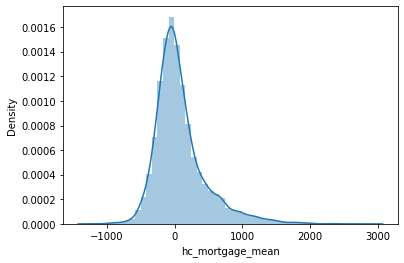

In [114]:
sns.distplot(residuals)

------------residuals follow the normal distribution----------

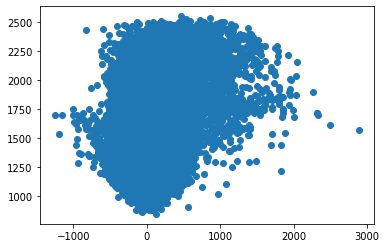

In [115]:
plt.scatter(residuals,y_pred)

In [116]:
df_train.to_excel("/content/drive/MyDrive/capstone project/Project 1/file/df_train.xlsx")
